In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ast
from functools import reduce

In [6]:
def cal_chi_squared(freq_table: list[list]) -> float:
    n = len(freq_table)
    m = len(freq_table[0])
    row_sum = [0 for i in range(n)]
    col_sum = [0 for i in range(m)]
    total_sum = 0
    for i in range(n):
        for j in range(m):
            row_sum[i] += freq_table[i][j]
            col_sum[j] += freq_table[i][j]
            total_sum  += freq_table[i][j]
    
    if reduce(lambda x, y: x * y, row_sum) == 0:
        print(freq_table)
        return -1
    p = 0
    while p < m:
        if col_sum[p] == 0:
            col_sum.pop(p)
            for r in freq_table:
                r.pop(p)
            m -= 1
        else:
            p += 1
    # print(freq_table)
    
    row_p = [f / total_sum for f in row_sum]
    col_p = [f / total_sum for f in col_sum]
    chi_squared = 0
    for i in range(n):
        for j in range(m):
            observe = freq_table[i][j]
            expectation = total_sum * row_p[i] * col_p[j]
            chi_squared += (observe - expectation) * (observe - expectation) / expectation
    return chi_squared

In [7]:
words = []
with open("words.txt", "r", encoding="utf-8") as words_text:
    words = [l.strip() for l in words_text.readlines()]
all_comments = pd.read_csv("all_comments.csv", encoding="utf-8")
print(words)
print(all_comments)

['dirt', 'refresh', 'shutout', 'stripclub', 'gaiday', 'thirdli', 'rhode', 'crisanti', 'doili', 'tampopo', 'chaz', 'harewood', 'qaeda', 'queensferri', 'winsor', 'homemad', 'iman', 'boudoir', 'daili', 'blare', 'simpler', 'faudel', 'muzzl', 'airport', 'mahattan', 'faster', 'donald', 'coher', 'apoplexi', 'rogerson', 'grayc', 'cuhligyooluh', 'storm', 'titlt', 'fufu', 'pretext', 'sapien', 'zena', 'kraft', 'bailout', 'mcquarri', 'calhern', 'lovelac', 'ever', 'anastasia', 'suceed', 'tn', 'hunland', 'eniemi', 'lazerov', 'salkow', 'unanswer', 'dewan', 'uncontest', 'starrett', 'counterfiet', 'torti', 'cognoscenti', 'krick', 'relentlessli', 'chim', 'attal', 'respiratori', 'danzig', 'barnstorm', 'hulya', 'overgrown', 'soni', 'sicilian', 'tbu', 'buzzi', 'optim', 'appendag', 'swedish', 'facil', 'appalachian', 'broaden', 'latex', 'bandstand', 'hemlock', 'mephisto', 'fondo', 'crowhaven', 'closup', 'garner', 'torresani', 'ruritanian', 'noteworthi', 'hyland', 'sheen', 'gywnn', 'invit', 'morrisett', 'fron

In [8]:
chi_squared_dict = {}
m_dict = {w : 2 for w in words}
freq_table_dict = {w : [[0 for j in range(2)]for i in range(2)] for w in words}
for i in range(len(all_comments)):
    pos = all_comments.at[i, "Positive"]
    freq_dict = ast.literal_eval(all_comments.at[i, "freq"])
    for w,freq in freq_dict.items():
        while freq >= m_dict[w]:
            for r in freq_table_dict[w]: r.append(0)
            m_dict[w] += 1
        freq_table_dict[w][1 if pos else 0][freq] += 1
    # print(i)
for w in words:
    chi_squared_dict[w] = cal_chi_squared(freq_table_dict[w])

[[0, 0], [0, 1]]
[[0, 0, 0, 1], [0, 0, 0, 0]]
[[0, 0], [0, 1]]
[[0, 1], [0, 0]]
[[0, 1], [0, 0]]
[[0, 0], [0, 1]]
[[0, 1], [0, 0]]
[[0, 1], [0, 0]]
[[0, 0], [0, 1]]
[[0, 0], [0, 1]]
[[0, 0], [0, 1]]
[[0, 0], [0, 1]]
[[0, 0, 0, 0], [0, 3, 0, 2]]
[[0, 1], [0, 0]]
[[0, 1], [0, 0]]
[[0, 0], [0, 1]]
[[0, 0, 0], [0, 0, 1]]
[[0, 2], [0, 0]]
[[0, 0], [0, 1]]
[[0, 0], [0, 1]]
[[0, 1], [0, 0]]
[[0, 3], [0, 0]]
[[0, 0], [0, 1]]
[[0, 1], [0, 0]]
[[0, 0, 0, 1], [0, 0, 0, 0]]
[[0, 0], [0, 2]]
[[0, 0], [0, 1]]
[[0, 1], [0, 0]]
[[0, 0, 1], [0, 0, 0]]
[[0, 1], [0, 0]]
[[0, 1], [0, 0]]
[[0, 0], [0, 3]]
[[0, 0, 1], [0, 0, 0]]
[[0, 0], [0, 1]]
[[0, 0], [0, 1]]
[[0, 1], [0, 0]]
[[0, 0, 0], [0, 0, 1]]
[[0, 1], [0, 0]]
[[0, 0], [0, 2]]
[[0, 2], [0, 0]]
[[0, 1], [0, 0]]
[[0, 0], [0, 1]]
[[0, 0], [0, 3]]
[[0, 0], [0, 1]]
[[0, 0], [0, 1]]
[[0, 1], [0, 0]]
[[0, 0, 1], [0, 0, 0]]
[[0, 3], [0, 0]]
[[0, 2], [0, 0]]
[[0, 0], [0, 2]]
[[0, 1], [0, 0]]
[[0, 0, 1], [0, 0, 0]]
[[0, 0], [0, 1]]
[[0, 0], [0, 1]]
[[0, 1], [

In [9]:
import pickle
with open("chi_squared.pkl", "bw") as file:
    pickle.dump(chi_squared_dict, file)

In [10]:
chi_squared_s = pd.Series(chi_squared_dict)
print(chi_squared_s)

dirt          0.695071
refresh       0.473612
shutout       0.000000
stripclub     0.000000
gaiday       -1.000000
                ...   
scarlatina   -1.000000
engend        0.000000
schya        -1.000000
entrain      -1.000000
conveyor      0.000000
Length: 48447, dtype: float64


<BarContainer object of 10 artists>

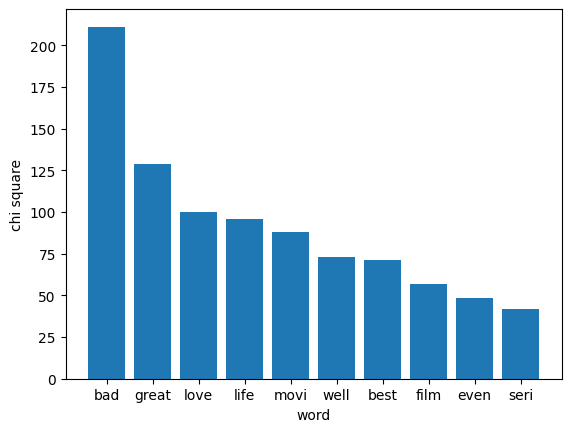

In [11]:
chi_squared_s.sort_values(ascending=False, inplace=True)
x = chi_squared_s.head(10).index
y = chi_squared_s.head(10).values
plt.ylabel("chi square")
plt.xlabel("word")
plt.bar(x, y)

In [12]:
valid = chi_squared_s[chi_squared_s >= 0]
print(valid)

bad       211.140947
great     129.083511
love      100.093064
life       96.023112
movi       87.809389
             ...    
drea        0.000000
infatu      0.000000
judah       0.000000
mimic       0.000000
godlik      0.000000
Length: 22094, dtype: float64


In [13]:
pos_chi_square = valid[valid > 0]
print(pos_chi_square)

bad             2.111409e+02
great           1.290835e+02
love            1.000931e+02
life            9.602311e+01
movi            8.780939e+01
                    ...     
deviou          2.103629e-31
quintessenti    1.126944e-31
wobbl           1.126944e-31
carefre         1.126944e-31
displeasur      1.126944e-31
Length: 12978, dtype: float64
